# --- Day 20 ---

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

plt.rcParams.update({
    "lines.color": "white",
    "patch.edgecolor": "white",
    "text.color": "black",
    "axes.facecolor": "white",
    "axes.edgecolor": "lightgray",
    "axes.labelcolor": "white",
    "xtick.color": "white",
    "ytick.color": "white",
    "grid.color": "lightgray",
    "figure.facecolor": "black",
    "figure.edgecolor": "black",
    "savefig.facecolor": "black",
    "savefig.edgecolor": "black"})

def bin_to_dec(b):
    d = 0
    for b1 in b:
        d = d << 1 | int(b1)
    return d

In [2]:
with open('d20.txt', 'r') as f:
    content = f.readlines()
enhancement = [1 if t == '#' else 0 for t in content[0].strip()]
base_image = np.array([[1 if t == '#' else 0 for t in c.strip()] for c in content[2:]])
base_image

array([[0, 1, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 1, 1],
       [1, 1, 0, ..., 1, 1, 1],
       ...,
       [0, 1, 1, ..., 1, 1, 0],
       [0, 1, 0, ..., 1, 1, 1],
       [0, 1, 0, ..., 0, 0, 1]])

Iteration  0
Iteration  1
Iteration  2
Iteration  3
Iteration  4
Iteration  5
Iteration  6
Iteration  7
Iteration  8
Iteration  9
Iteration  10
Iteration  11
Iteration  12
Iteration  13
Iteration  14
Iteration  15
Iteration  16
Iteration  17
Iteration  18
Iteration  19
Iteration  20
Iteration  21
Iteration  22
Iteration  23
Iteration  24
Iteration  25
Iteration  26
Iteration  27
Iteration  28
Iteration  29
Iteration  30
Iteration  31
Iteration  32
Iteration  33
Iteration  34
Iteration  35
Iteration  36
Iteration  37
Iteration  38
Iteration  39
Iteration  40
Iteration  41
Iteration  42
Iteration  43
Iteration  44
Iteration  45
Iteration  46
Iteration  47
Iteration  48
Iteration  49
13202.0 pixels are active.


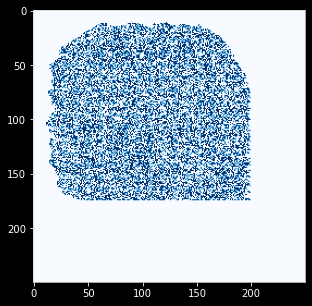

In [3]:
new_image = np.copy(base_image)
pad = 100
padded_image = np.zeros(shape=(new_image.shape[0]+2*pad, new_image.shape[1]+2*pad))
padded_image[pad:-pad, pad:-pad] = new_image
for i in range(50):
    new_image = np.zeros(shape=padded_image.shape)
    for y in range(new_image.shape[0]):
        for x in range(new_image.shape[1]):
            v = bin_to_dec(padded_image[y-1:y+2, x-1:x+2].flatten())
            new_image[y, x] = enhancement[v]
    padded_image = new_image
    print('Iteration ', i)
    
new_image = new_image[50:, 50:]
print(f'{np.sum(new_image)} pixels are active.')
fig = plt.figure(figsize=(5,5))
plt.imshow(new_image, cmap='Blues')